In [1]:
import pandas as pd
df2 = pd.read_csv('/home/germain/Documents/topic models/generalized_topic_model_dev/data/us_congressional_record/us_congress_114_house.csv')
df2

,chamber_x,date,speaker,speakerid,party,doc_clean,session,dwnom1d
0,H,20150430,Mrs. BLACKBURN,114118630,R,friend mention cost cost furnace cost require ...,114.0,0.631
1,H,20150430,Mr. SIMPSON,114121390,R,opposition assure sympathetic intention try se...,114.0,0.297
2,H,20150430,Mr. CASTRO of Texas,114122590,D,appropriation process tough one difficult choi...,114.0,-0.398
3,H,20150430,Mr. SIMPSON,114121390,R,understand try sympathize try correct fund rem...,114.0,0.297
4,H,20150430,Mrs. BLACKBURN,114118630,R,propose new eliminate natural_gas home furnace...,114.0,0.631
...,...,...,...,...,...,...,...,...
16082,H,20151207,Mr. CONNOLLY,114119020,D,such consume afternoon join friend sponsor com...,114.0,-0.308
16083,H,20151207,Mrs. BUSTOS,114122210,D,hard work democratic coleader goal straightfor...,114.0,-0.239
16084,H,20151207,Mr. CONNOLLY,114119020,D,friend leadership important friend part improp...,114.0,-0.308
16085,H,20151207,Mr. UPTON,114121610,R,such consume strong partner friend pallone imp...,114.0,0.320


In [2]:
import sys
sys.path.append('../IdealPointNN/')
from dataset import IdealPointNNDataset
from ideal_point_model import IdealPointNN

train_data = IdealPointNNDataset(
    df2,
    labels = "~party -1",
)
train_data.add_modality(
    df2,
    modality = 'text',
    vectorizer_args = {
        "max_df": 0.99,
        "min_df": 0.001
    }
)

/home/germain/Documents/neural_ideal_points/neural_ideal_point_models/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
len(train_data.data['text']['vectorizer'].vocabulary_)

5329

In [4]:
train_data.M_labels

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [6]:
train_datasets = [train_data]

In [7]:
m = IdealPointNN(
    train_datasets,
    n_dims=1,
    update_prior=False,
    log_every_n_epochs=1,
    dropout=0.2,
    batch_size=64,
    w_prior=100,
    learning_rate=1e-3,
    print_every_n_batches=1000,
    num_epochs=100,
    patience=3,
    w_pred_loss=100
)

Epoch   1	Mean Loss: 963.2941795

Epoch   2	Mean Loss: 926.5748843

Epoch   3	Mean Loss: 919.4887005

Epoch   4	Mean Loss: 916.8941173

Epoch   5	Mean Loss: 913.1556283

Epoch   6	Mean Loss: 911.5909467

Epoch   7	Mean Loss: 908.4745147

Epoch   8	Mean Loss: 904.3533432

Epoch   9	Mean Loss: 897.7725886

Epoch  10	Mean Loss: 892.9988418

Epoch  11	Mean Loss: 888.3988769

Epoch  12	Mean Loss: 885.7395627

Epoch  13	Mean Loss: 881.8320240

Epoch  14	Mean Loss: 879.7343297

Epoch  15	Mean Loss: 877.9448978

Epoch  16	Mean Loss: 875.7869779

Epoch  17	Mean Loss: 874.8735134

Epoch  18	Mean Loss: 872.8039253

Epoch  19	Mean Loss: 872.1981131

Epoch  20	Mean Loss: 872.2048316

Epoch  21	Mean Loss: 870.5018177

Epoch  22	Mean Loss: 871.8480106

Epoch  23	Mean Loss: 868.9037245

Epoch  24	Mean Loss: 868.8844701

Epoch  25	Mean Loss: 868.3030117

Epoch  26	Mean Loss: 867.9888231

Epoch  27	Mean Loss: 868.6312447

Epoch  28	Mean Loss: 868.8298267

Epoch  29	Mean Loss: 867.5379474

Epoch  30	Mean

In [8]:
df2['ideal_point'] = m.get_ideal_points(train_datasets)

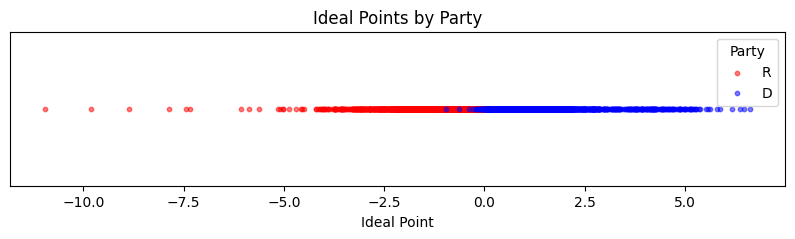

In [9]:
import matplotlib.pyplot as plt

# Define colors for each party
colors = {'R': 'red', 'D': 'blue'}

# Create a scatter plot
plt.figure(figsize=(10, 2))
for party in df2['party'].unique():
    subset = df2[df2['party'] == party]
    plt.scatter(subset['ideal_point'], [1]*len(subset), color=colors[party], label=party, s=10, alpha = 0.5)

# Adding labels and title
plt.yticks([])  # Hide the y-axis
plt.xlabel('Ideal Point')
plt.title('Ideal Points by Party')
plt.legend(title='Party')

# Display the plot
plt.show()

In [10]:
df2.sort_values(by = 'ideal_point')

,chamber_x,date,speaker,speakerid,party,doc_clean,session,dwnom1d,ideal_point
5530,H,20150210,Mr. ROHRABACHER,114121050,R,like present heartfelt case scientific researc...,114.0,0.626,-10.949051
2771,H,20150624,Mr. ROHRABACHER,114121050,R,draw attention people legislative threat safet...,114.0,0.626,-9.810900
1045,H,20150515,Mr. ROHRABACHER,114121050,R,warn people several threat safety prosperity t...,114.0,0.626,-8.867489
1385,H,20150319,Mr. ROHRABACHER,114121050,R,hope pay attention wonderful idea give play ro...,114.0,0.626,-7.851621
1795,H,20150422,Mr. ROHRABACHER,114121050,R,draw attention people come come people notice ...,114.0,0.626,-7.450588
...,...,...,...,...,...,...,...,...,...
8861,H,20160711,Mr. KILDEE,114122300,D,last week wake_horrific news violence terrible...,114.0,-0.362,5.866488
11695,H,20151008,Ms. ESTY,114122120,D,opposition opportunity bipartisan gun_violence...,114.0,-0.315,6.182779
10779,H,20160622,Mr. CICILLINE,114118920,D,horrific mass_shooting place stark_reminder ur...,114.0,-0.389,6.381897
10890,H,20160705,Mr. CICILLINE,114118920,D,come republican bring proposal reduce gun_viol...,114.0,-0.389,6.462628


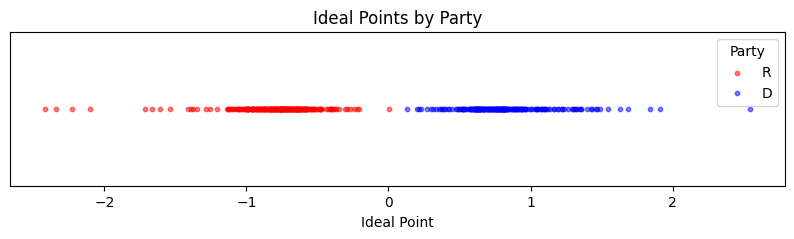

In [11]:
mean_ideal_point = df2.groupby(['speaker', 'party', 'dwnom1d'])['ideal_point'].mean().reset_index()

import matplotlib.pyplot as plt

# Define colors for each party
colors = {'R': 'red', 'D': 'blue'}

# Create a scatter plot
plt.figure(figsize=(10, 2))
for party in mean_ideal_point['party'].unique():
    subset = mean_ideal_point[mean_ideal_point['party'] == party]
    plt.scatter(subset['ideal_point'], [1]*len(subset), color=colors[party], label=party, s=10, alpha = 0.5)

# Adding labels and title
plt.yticks([])  # Hide the y-axis
plt.xlabel('Ideal Point')
plt.title('Ideal Points by Party')
plt.legend(title='Party')

# Display the plot
plt.show()

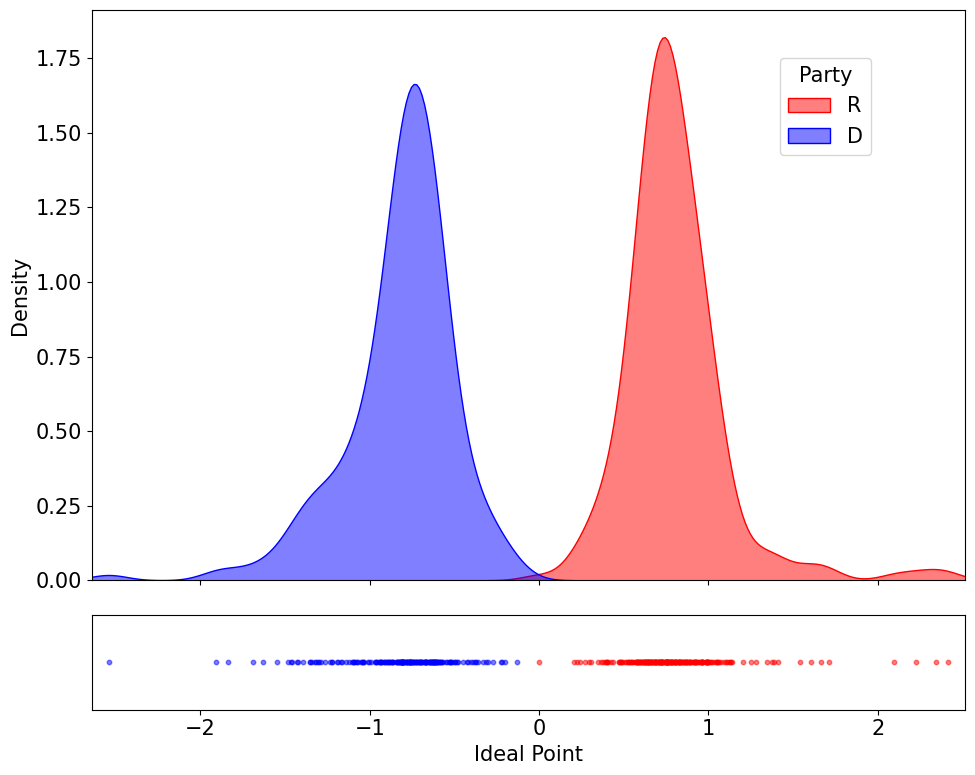

In [12]:
# Set general font size for all labels
plt.rcParams.update({
    'font.size': 15,            # Base font size
    'axes.titlesize': 15,       # Font size for plot titles
    'axes.labelsize': 15,       # Font size for x and y labels
    'xtick.labelsize': 15,      # Font size for x-axis tick labels
    'ytick.labelsize': 15,      # Font size for y-axis tick labels
    'legend.fontsize': 15,      # Font size for legend
    'figure.titlesize': 16      # Font size for figure title
})

import matplotlib.pyplot as plt
import seaborn as sns

mean_ideal_point['ideal_point'] = -1 * mean_ideal_point['ideal_point']

# Define colors for each party
colors = {'R': 'red', 'D': 'blue'}

# Set up the figure with two subplots: one for the density plot and one for the scatter plot
fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 0.5]}, sharex=True)

# Density plot (top subplot)
for party in mean_ideal_point['party'].unique():
    subset = mean_ideal_point[mean_ideal_point['party'] == party]
    sns.kdeplot(subset['ideal_point'], fill=True, color=colors[party], label=party, alpha=0.5, ax=axes[0])

# Customize density plot
axes[0].set_xlabel('')  # Remove redundant x-axis label
axes[0].set_ylabel('Density')

# Scatter plot (bottom subplot)
for party in mean_ideal_point['party'].unique():
    subset = mean_ideal_point[mean_ideal_point['party'] == party]
    axes[1].scatter(subset['ideal_point'], [1] * len(subset), color=colors[party], s=10, alpha=0.5)

# Customize scatter plot
axes[1].set_yticks([])  # Hide the y-axis ticks
axes[1].set_xlabel('Ideal Point')

# Set x-axis limits to be shared by both subplots
x_limits = [mean_ideal_point['ideal_point'].min()-0.1, mean_ideal_point['ideal_point'].max()+0.1]
axes[0].set_xlim(x_limits)
axes[1].set_xlim(x_limits)

# Add a unified legend in the top subplot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Party', loc=(0.8, 0.8))

# Adjust layout for a cleaner look
plt.tight_layout()
plt.savefig('congress_114_predict_party.pdf')
plt.show()


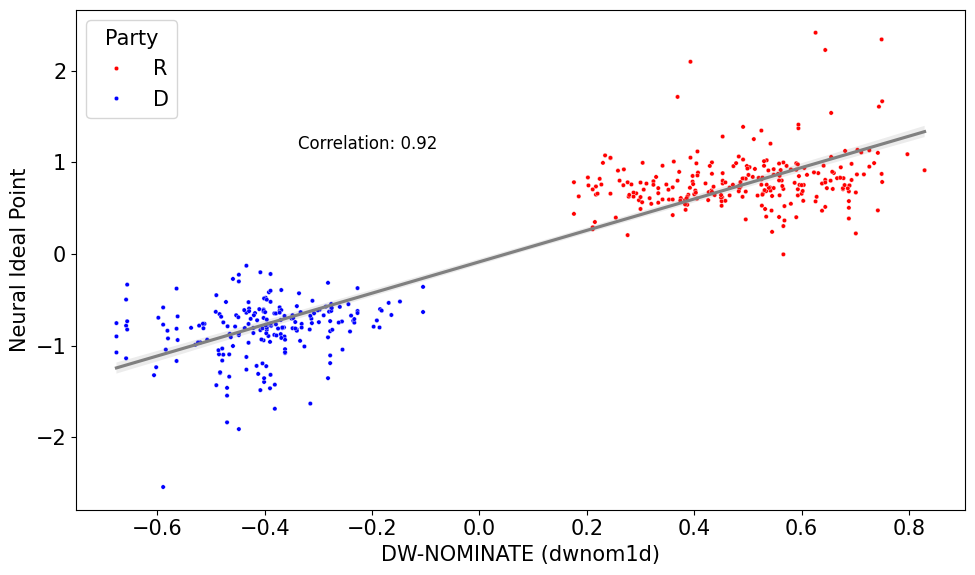

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Define colors for each party
colors = {'R': 'red', 'D': 'blue'}

# Calculate correlation coefficient
correlation, _ = pearsonr(mean_ideal_point['dwnom1d'], mean_ideal_point['ideal_point'])

# Scatter plot with linear fit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_ideal_point, x='dwnom1d', y='ideal_point', hue='party', palette=colors, alpha=1, s=10)
sns.regplot(data=mean_ideal_point, x='dwnom1d', y='ideal_point', scatter=False, color='grey', line_kws={"label": "Linear Fit"})

# Display correlation coefficient
plt.text(0.25, 0.75, f'Correlation: {correlation:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)

# Customize plot
plt.xlabel('DW-NOMINATE (dwnom1d)')
plt.ylabel('Neural Ideal Point')
plt.legend(title='Party')
plt.tight_layout()
plt.savefig('congress_114_predict_party_vs_dwnom1d.pdf')
plt.show()


In [14]:
mean_ideal_point.sort_values(by='ideal_point').reset_index(drop=True)

,speaker,party,dwnom1d,ideal_point
0,ters. JOHN LEWIS,D,-0.589,-2.541893
1,Ms. NAPOLITANO,D,-0.448,-1.910063
2,Ms. KELLY,D,-0.470,-1.836508
3,Ms. SPEIER,D,-0.381,-1.688030
4,Ms. ESTY,D,-0.315,-1.631707
...,...,...,...,...
453,Mr. TROTTs,R,0.369,1.714786
454,Ms. WAGNER,R,0.393,2.098193
455,Mr. GOHMERT,R,0.644,2.226783
456,Mr. FRANKS of Arizona,R,0.749,2.342213


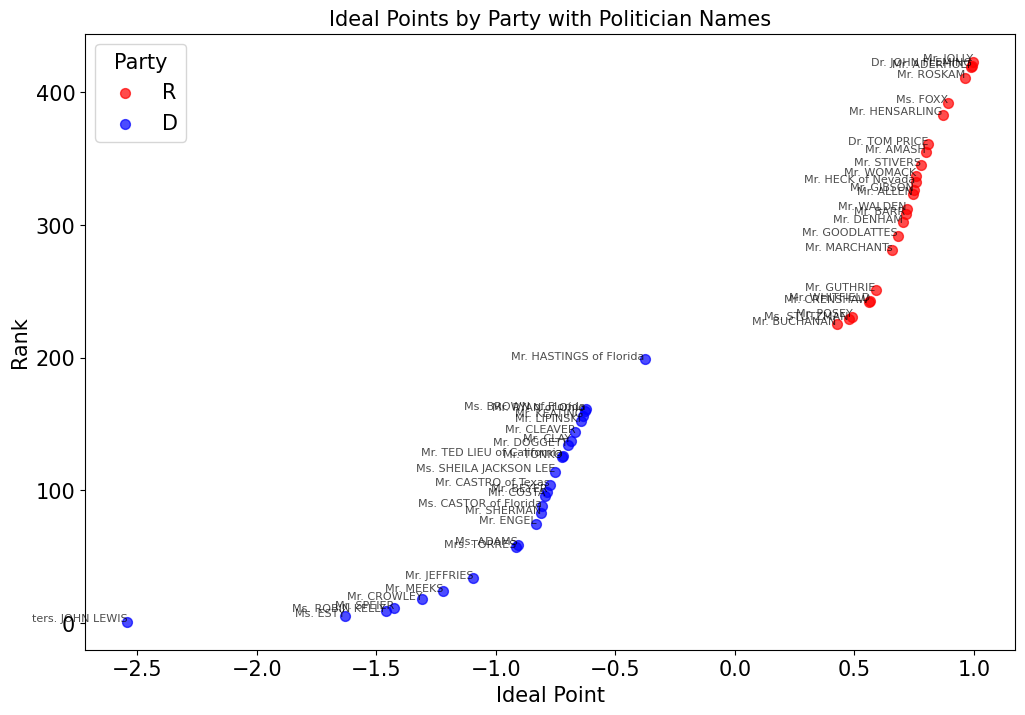

In [15]:
import matplotlib.pyplot as plt

# Define colors for each party
colors = {'D': 'blue', 'R': 'red'}

# Sort the DataFrame by 'ideal_point' to assign ranks
df_sorted = mean_ideal_point.sort_values(by='ideal_point').reset_index(drop=True)
df_sorted['rank'] = df_sorted.index + 1

df_sorted = df_sorted.sample(50)

# Create a scatter plot
plt.figure(figsize=(12, 8))
for party in df_sorted['party'].unique():
    subset = df_sorted[df_sorted['party'] == party]
    plt.scatter(subset['ideal_point'], subset['rank'], color=colors[party], label=party, s=50, alpha=0.7)
    for _, row in subset.iterrows():
        plt.text(row['ideal_point'], row['rank'], row['speaker'], fontsize=8, ha='right', alpha=0.7)

# Adding labels and title
plt.ylabel('Rank')
plt.xlabel('Ideal Point')
plt.title('Ideal Points by Party with Politician Names')
plt.legend(title='Party')

# Reverse the y-axis so that rank 1 is at the top
plt.gca() #.invert_yaxis()

# Display the plot
plt.show()